In [419]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

pd.options.display.max_columns = None



In [420]:
data = pd.read_csv("../data/LBNL_file.csv", low_memory=False)

df5 = data.replace([-9999, '-9999', -9999.0], np.nan)
df5["installation_date"] = pd.to_datetime(df5["installation_date"])

In [421]:
#profile = ProfileReport(df5, title="Pandas Profiling Report")
#profile.to_file("your_report.html")


# # Import label encoder
# from sklearn import preprocessing
  
# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# df5["module_manufacturer_1"] = label_encoder.fit_transform(df5["module_manufacturer_1"])
# df5["technology_module_1"] = label_encoder.fit_transform(df5["technology_module_1"])
# df5["inverter_manufacturer_1"] = label_encoder.fit_transform(df5["inverter_manufacturer_1"])
# df5["module_model_1"] = label_encoder.fit_transform(df5["module_model_1"])
# df5["inverter_model_1"] = label_encoder.fit_transform(df5["inverter_model_1"])
# df5["city"] = label_encoder.fit_transform(df5["city"])
# df5["utility_service_territory"] = label_encoder.fit_transform(df5["utility_service_territory"])
# df5["installer_name"] = label_encoder.fit_transform(df5["installer_name"])
# #df5["state"] = label_encoder.fit_transform(df5["state"])

In [422]:

#df5["installation_date"] = pd.to_datetime(df5["installation_date"])


df5.head(5)

,data_provider_1,data_provider_2,system_ID_1,system_ID_2,installation_date,system_size_DC,total_installed_price,rebate_or_grant,customer_segment,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,zip_code,city,state,utility_service_territory,third_party_owned,installer_name,self_installed,azimuth_1,azimuth_2,azimuth_3,tilt_1,tilt_2,tilt_3,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,technology_module_3,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,solar_storage_hybrid_inverter_3,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,Arkansas State Energy Office,NaN,NaN,NaN,2010-04-29,2.016,14558.0,0.0,RES,0.0,0.0,NaN,0.0,0.0,71953,Mena,AR,SWEPCO,0.0,Liberty Solar Solutions,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Sharp,ND-224UC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multi-c-Si,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,ENPHASE ENERGY INC.,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
1,Arkansas State Energy Office,NaN,NaN,NaN,2010-04-26,3.360,26096.0,0.0,RES,0.0,0.0,NaN,0.0,0.0,72641,Jasper,AR,Carroll Electric,0.0,Liberty Solar Solutions,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Sharp,ND-224UC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multi-c-Si,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,ENPHASE ENERGY INC.,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
2,Arkansas State Energy Office,NaN,NaN,NaN,2010-04-20,13.440,91139.0,0.0,RES,0.0,0.0,NaN,0.0,0.0,71801,Hope,AR,Hope Water & Light,0.0,Liberty Solar Solutions,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Sharp,ND-224UC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multi-c-Si,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,ENPHASE ENERGY INC.,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,NaN,NaN
3,Arkansas State Energy Office,NaN,NaN,NaN,2010-04-21,5.520,40043.0,0.0,RES,0.0,0.0,NaN,0.0,0.0,71909,Hot Springs Village,AR,First Electric,0.0,Liberty Solar Solutions,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Sharp,NU-U230F3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mono,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,ENPHASE ENERGY INC.,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN
4,Arkansas State Energy Office,NaN,NaN,NaN,2010-04-22,2.530,21497.0,0.0,RES,0.0,0.0,NaN,0.0,0.0,71909,Hot Springs Village,AR,Entergy,0.0,Liberty Solar Solutions,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Sharp,NU-U230F3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mono,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,ENPHASE ENERGY INC.,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,NaN,NaN


In [423]:
df5["battery_rated_capacity_kW"] = df5["battery_rated_capacity_kW"].replace(np.nan, 0)
df5["battery_rated_capacity_kWh"] = df5["battery_rated_capacity_kWh"].replace(np.nan, 0)

esim109 = df5.corrwith(df5["total_installed_price"])

esim109.to_frame().T

,system_size_DC,total_installed_price,rebate_or_grant,expansion_system,multiple_phase_system,new_construction,tracking,ground_mounted,third_party_owned,self_installed,azimuth_1,azimuth_2,azimuth_3,tilt_1,tilt_2,tilt_3,module_quantity_1,module_quantity_2,module_quantity_3,additional_modules,technology_module_3,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_quantity_1,inverter_quantity_2,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,solar_storage_hybrid_inverter_3,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,0.735356,1.0,0.244279,0.001553,0.032726,-0.280077,0.089742,0.141472,-0.015076,-0.012437,-0.005036,0.003793,0.004423,-0.073553,-0.177069,-0.227959,0.725707,0.409925,0.734652,0.018886,NaN,0.00132,0.012251,0.006521,-0.000213,0.001249,NaN,0.006466,0.037092,0.025557,-0.037168,-0.032994,-0.057854,0.038226,0.135598,0.224984,0.080693,-0.049,-0.039244,-0.133793,-0.000863,-0.016343,NaN,0.024771,-0.059796,-0.009988,0.565122,0.597944,0.488698,-0.035567,0.01422,0.120247,0.046022


In [424]:
cols = ['installation_date', 'system_size_DC', 'total_installed_price',
        'customer_segment', 'expansion_system', "state", "ground_mounted","rebate_or_grant" ,
       'multiple_phase_system', 'new_construction', 'third_party_owned', 
       'self_installed',  'module_manufacturer_1', 'module_model_1',
       'module_quantity_1', 'module_manufacturer_2', 'module_model_2',
       'module_quantity_2', 'module_manufacturer_3', 'module_model_3',
       'module_quantity_3', 'additional_modules', 'technology_module_1',
       'technology_module_2', 'BIPV_module_1',
       'BIPV_module_2', 'BIPV_module_3', 'bifacial_module_1',
       'bifacial_module_2', 'bifacial_module_3', 'nameplate_capacity_module_1',
       'nameplate_capacity_module_2', 'nameplate_capacity_module_3',
       'efficiency_module_1', 'efficiency_module_2', 'efficiency_module_3',
       'inverter_manufacturer_1', 'inverter_model_1', 'inverter_quantity_1',
       'inverter_manufacturer_2', 'inverter_model_2', 'inverter_quantity_2',
       'inverter_manufacturer_3', 'inverter_model_3', 'inverter_quantity_3',
       'additional_inverters', 'micro_inverter_1', 'micro_inverter_2',
       'micro_inverter_3', 'solar_storage_hybrid_inverter_1',
       'solar_storage_hybrid_inverter_2', 
       'built_in_meter_inverter_1', 'built_in_meter_inverter_2',
       'built_in_meter_inverter_3', 'output_capacity_inverter_1',
       'output_capacity_inverter_2', 'output_capacity_inverter_3',
       'DC_optimizer', 'inverter_loading_ratio', 'battery_rated_capacity_kW',
       'battery_rated_capacity_kWh'] 
       #,"city", "utility_service_territory", "installer_name", "module_manufacturer_1", "module_model_1", "technology_module_1", "inverter_manufacturer_1", "inverter_model_1" ]

In [425]:
df_clean = df5[cols].copy()

df_clean.head(10)

,installation_date,system_size_DC,total_installed_price,customer_segment,expansion_system,state,ground_mounted,rebate_or_grant,multiple_phase_system,new_construction,third_party_owned,self_installed,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
0,2010-04-29,2.016,14558.0,RES,0.0,AR,0.0,0.0,0.0,NaN,0.0,0.0,Sharp,ND-224UC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multi-c-Si,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,ENPHASE ENERGY INC.,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,0.0,0.0
1,2010-04-26,3.360,26096.0,RES,0.0,AR,0.0,0.0,0.0,NaN,0.0,0.0,Sharp,ND-224UC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multi-c-Si,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,ENPHASE ENERGY INC.,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,0.0,0.0
2,2010-04-20,13.440,91139.0,RES,0.0,AR,0.0,0.0,0.0,NaN,0.0,0.0,Sharp,ND-224UC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multi-c-Si,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,ENPHASE ENERGY INC.,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,0.0,0.0
3,2010-04-21,5.520,40043.0,RES,0.0,AR,0.0,0.0,0.0,NaN,0.0,0.0,Sharp,NU-U230F3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,ENPHASE ENERGY INC.,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,0.0,0.0
4,2010-04-22,2.530,21497.0,RES,0.0,AR,0.0,0.0,0.0,NaN,0.0,0.0,Sharp,NU-U230F3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,ENPHASE ENERGY INC.,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,0.0,0.0
5,2010-04-22,3.450,30617.0,RES,0.0,AR,0.0,0.0,0.0,NaN,0.0,0.0,Sharp,NU-U230F3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,ENPHASE ENERGY INC.,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,0.0,0.0
6,2010-04-21,3.220,27978.0,RES,0.0,AR,0.0,0.0,0.0,NaN,0.0,0.0,Sharp,NU-U230F3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,230.0,NaN,NaN,0.141090,NaN,NaN,ENPHASE ENERGY INC.,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,0.0,0.0
7,2010-05-18,12.880,90873.0,RES,0.0,AR,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poly,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENPHASE ENERGY INC.,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.210526,0.0,0.0
8,2010-06-03,3.360,26166.0,RES,0.0,AR,1.0,0.0,0.0,NaN,0.0,0.0,Sharp,ND-224UC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Multi-c-Si,NaN,0.0,NaN,NaN,0.0,NaN,NaN,224.0,NaN,NaN,0.142431,NaN,NaN,ENPHASE ENERGY INC.,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.19,NaN,NaN,0.0,1.178947,0.0,0.0
9,2010-05-11,2.700,18596.0,RES,0.0,AR,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,N

In [426]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 61 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   installation_date                1000000 non-null  datetime64[ns]
 1   system_size_DC                   988692 non-null   float64       
 2   total_installed_price            814364 non-null   float64       
 3   customer_segment                 1000000 non-null  object        
 4   expansion_system                 1000000 non-null  float64       
 5   state                            1000000 non-null  object        
 6   ground_mounted                   759462 non-null   float64       
 7   rebate_or_grant                  954632 non-null   float64       
 8   multiple_phase_system            1000000 non-null  float64       
 9   new_construction                 207044 non-null   float64       
 10  third_party_owned              

In [427]:
#df_clean = df_clean[(df_clean["module_quantity_2"].notnull()) | (df_clean["module_quantity_3"].notnull())]

#df_clean = df_clean.dropna(subset=["system_size_DC","total_installed_price"])

#df_clean = df_clean[df_clean['total_installed_price'].isnull()]

df_clean = df_clean[df_clean["state"] == "CA"]      # Koska muita osavaltioita on van reilu 1k ja halutaan tehdä tästä pelkästään californiaa koskeva

In [428]:
df_clean.head()


#ass = df[(df["maakunta"] != "Uusimaa") & (df["kuntamuoto"] == "Kaupunki")]

#uss = df_clean[(df_clean["inverter_quantity_1"] > 1) & (df_clean["micro_inverter_1"] < 1)]
#uss.head(10)

,installation_date,system_size_DC,total_installed_price,customer_segment,expansion_system,state,ground_mounted,rebate_or_grant,multiple_phase_system,new_construction,third_party_owned,self_installed,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh
105,2019-12-06,10.080367,30660.0,RES,0.0,CA,0.0,0.0,0.0,NaN,0.0,0.0,LG Electronics Inc.,LG320N1K-A5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,320.0,NaN,NaN,0.194092,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
106,2019-12-05,9.000000,39648.0,RES,0.0,CA,0.0,0.0,0.0,NaN,0.0,0.0,LG Electronics Inc.,LG360Q1C-A5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,360.0,NaN,NaN,0.215146,NaN,NaN,Enphase Energy Inc.,IQ7PLUS-72-x-US [240V],25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.290,NaN,NaN,0.0,1.241379,0.0,0.0
107,2019-12-02,15.180000,43263.0,RES,0.0,CA,0.0,0.0,0.0,NaN,0.0,0.0,SolarCity,SC330,46.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Multi-c-Si,NaN,0.0,NaN,NaN,0.0,NaN,NaN,330.0,NaN,NaN,0.197101,NaN,NaN,SOLAREDGE TECHNOLOGIES LTD.,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0
108,2019-12-12,5.180000,22345.0,RES,0.0,CA,0.0,0.0,0.0,NaN,0.0,0.0,LG Electronics Inc.,LG370Q1C-V5,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,370.0,NaN,NaN,0.221123,NaN,NaN,ENPHASE ENERGY INC.,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.290,NaN,NaN,0.0,1.275862,0.0,0.0
109,2019-12-23,3.520000,21155.0,RES,0.0,CA,0.0,0.0,0.0,NaN,1.0,0.0,"Jinko Solar Co., Ltd",JKM320M-60HBL,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,320.0,NaN,NaN,0.197531,NaN,NaN,SolarEdge Technologies Ltd.,SE3800H-US [240V],1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,3.747,NaN,NaN,1.0,0.939418,0.0,0.0


In [429]:
df_clean["module_quantity"] = df_clean[["module_quantity_1", "module_quantity_2", "module_quantity_3"]].sum(axis=1, min_count=1)
#df_clean["inverter_quantity"] = df_clean[["inverter_quantity_1", "inverter_quantity_2", "inverter_quantity_3"]].sum(axis=1, min_count=1)

#df_clean["output_capacity_inverter"] = df_clean["system_size_DC"] / df_clean["inverter_loading_ratio"]



# df_clean["output_capacity_inverter_1"] = np.where(df_clean["micro_inverter_1"] == 1,df_clean["inverter_quantity_1"] * df_clean["output_capacity_inverter_1"], df_clean["output_capacity_inverter_1"])
# df_clean["output_capacity_inverter_2"] = np.where(df_clean["micro_inverter_2"] == 1,df_clean["inverter_quantity_2"] * df_clean["output_capacity_inverter_2"], df_clean["output_capacity_inverter_2"])
# df_clean["output_capacity_inverter_3"] = np.where(df_clean["micro_inverter_3"] == 1,df_clean["inverter_quantity_3"] * df_clean["output_capacity_inverter_3"], df_clean["output_capacity_inverter_3"])

df_clean["output_capacity_inverter"] = df_clean[["output_capacity_inverter_1", "output_capacity_inverter_2", "output_capacity_inverter_3"]].sum(axis=1, min_count=1)

#df_clean["inverter_loading_ratio2"] = df_clean["system_size_DC"] / df_clean["output_capacity_inverter"]

df_clean["efficiency_module"] = df_clean[["efficiency_module_1", "efficiency_module_2", "efficiency_module_3"]].mean(axis=1)
df_clean["nameplate_capacity_module"] = df_clean[["nameplate_capacity_module_1", "nameplate_capacity_module_2", "nameplate_capacity_module_3"]].sum(axis=1, min_count=1)

df_clean["BIPV_module"] = np.where(df_clean[["BIPV_module_1", "BIPV_module_2", "BIPV_module_3"]].sum(axis=1, min_count=1) >= 1, 1, 0)
df_clean["bifacial_module"] = np.where(df_clean[["bifacial_module_1", "bifacial_module_2", "bifacial_module_3"]].sum(axis=1, min_count=1) >= 1, 1, 0)
df_clean["micro_inverter"] = np.where(df_clean[["micro_inverter_1", "micro_inverter_2", "micro_inverter_3"]].sum(axis=1, min_count=1) >= 1, 1, 0)
df_clean["solar_storage_hybrid_inverter"] = np.where(df_clean[["solar_storage_hybrid_inverter_1", "solar_storage_hybrid_inverter_2"]].sum(axis=1, min_count=1) >= 1, 1, 0)
df_clean["built_in_meter_inverter"] = np.where(df_clean[["built_in_meter_inverter_1", "built_in_meter_inverter_2", "built_in_meter_inverter_3"]].sum(axis=1, min_count=1) >= 1, 1, 0)




#testi = df_clean.iloc[0]["module_quantity_1"]

#df_clean = df_clean.loc[df_clean["inverter_loading_ratio"].isna()]
df_clean.head(20)


# df2.loc[df2['micro_inverter_1']==1.0 ,'micro_inverter_qty'] += df2['inverter_quantity_1']
# df3['inverter_total_output_1'] += (df2['inverter_quantity_1'] * df2['output_capacity_inverter_1'])


,installation_date,system_size_DC,total_installed_price,customer_segment,expansion_system,state,ground_mounted,rebate_or_grant,multiple_phase_system,new_construction,third_party_owned,self_installed,module_manufacturer_1,module_model_1,module_quantity_1,module_manufacturer_2,module_model_2,module_quantity_2,module_manufacturer_3,module_model_3,module_quantity_3,additional_modules,technology_module_1,technology_module_2,BIPV_module_1,BIPV_module_2,BIPV_module_3,bifacial_module_1,bifacial_module_2,bifacial_module_3,nameplate_capacity_module_1,nameplate_capacity_module_2,nameplate_capacity_module_3,efficiency_module_1,efficiency_module_2,efficiency_module_3,inverter_manufacturer_1,inverter_model_1,inverter_quantity_1,inverter_manufacturer_2,inverter_model_2,inverter_quantity_2,inverter_manufacturer_3,inverter_model_3,inverter_quantity_3,additional_inverters,micro_inverter_1,micro_inverter_2,micro_inverter_3,solar_storage_hybrid_inverter_1,solar_storage_hybrid_inverter_2,built_in_meter_inverter_1,built_in_meter_inverter_2,built_in_meter_inverter_3,output_capacity_inverter_1,output_capacity_inverter_2,output_capacity_inverter_3,DC_optimizer,inverter_loading_ratio,battery_rated_capacity_kW,battery_rated_capacity_kWh,module_quantity,output_capacity_inverter,efficiency_module,nameplate_capacity_module,BIPV_module,bifacial_module,micro_inverter,solar_storage_hybrid_inverter,built_in_meter_inverter
105,2019-12-06,10.080367,30660.00,RES,0.0,CA,0.0,0.0,0.0,NaN,0.0,0.0,LG Electronics Inc.,LG320N1K-A5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,320.0,NaN,NaN,0.194092,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,25.0,NaN,0.194092,320.0,0,0,1,0,0
106,2019-12-05,9.000000,39648.00,RES,0.0,CA,0.0,0.0,0.0,NaN,0.0,0.0,LG Electronics Inc.,LG360Q1C-A5,25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,360.0,NaN,NaN,0.215146,NaN,NaN,Enphase Energy Inc.,IQ7PLUS-72-x-US [240V],25.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.290,NaN,NaN,0.0,1.241379,0.0,0.0,25.0,0.290,0.215146,360.0,0,0,1,0,0
107,2019-12-02,15.180000,43263.00,RES,0.0,CA,0.0,0.0,0.0,NaN,0.0,0.0,SolarCity,SC330,46.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Multi-c-Si,NaN,0.0,NaN,NaN,0.0,NaN,NaN,330.0,NaN,NaN,0.197101,NaN,NaN,SOLAREDGE TECHNOLOGIES LTD.,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,46.0,NaN,0.197101,330.0,0,0,0,0,0
108,2019-12-12,5.180000,22345.00,RES,0.0,CA,0.0,0.0,0.0,NaN,0.0,0.0,LG Electronics Inc.,LG370Q1C-V5,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,370.0,NaN,NaN,0.221123,NaN,NaN,ENPHASE ENERGY INC.,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.290,NaN,NaN,0.0,1.275862,0.0,0.0,14.0,0.290,0.221123,370.0,0,0,1,0,0
109,2019-12-23,3.520000,21155.00,RES,0.0,CA,0.0,0.0,0.0,NaN,1.0,0.0,"Jinko Solar Co., Ltd",JKM320M-60HBL,11.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,320.0,NaN,NaN,0.197531,NaN,NaN,SolarEdge Technologies Ltd.,SE3800H-US [240V],1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,1.0,NaN,NaN,3.747,NaN,NaN,1.0,0.939418,0.0,0.0,11.0,3.747,0.197531,320.0,0,0,0,0,1
110,2019-12-05,4.485000,18197.00,RES,0.0,CA,0.0,0.0,0.0,NaN,0.0,0.0,SunPower,SPR-X21-345,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,345.0,NaN,NaN,0.211564,NaN,NaN,SolarEdge Technologies,SE3800H-US (240V),1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,0.0,13.0,NaN,0.211564,345.0,0,0,0,0,0
111,2019-12-11,3.900000,21450.00,RES,0.0,CA,0.0,0.0,0.0,NaN,1.0,0.0,Canadian Solar Inc.,CS1H-325MS,12.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Mono,NaN,0.0,NaN,NaN,0.0,NaN,NaN,325.0,NaN,NaN,0.199387,NaN,NaN,SOLAREDGE TECHNOLOGIES,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.800,NaN,NaN,1.0,1.026316,0.0,0.0,12.0,3.800,0.199387,325.0,0,0,0,0,0
112,2019-12-03,3.840000,21120.00,RES,0.0,CA,0.0,0.0,0.0,NaN,1.0,0.0,"Jinko Solar C

In [430]:

# asd = df_clean[["inverter_loading_ratio","inverter_loading_ratio2"]].round(2)

# #asd = asd.dropna()

# asd = df_clean[df_clean["inverter_loading_ratio"] != df_clean["inverter_loading_ratio2"]]


# asd.sample(20)
#df_clean.iloc[118:]

In [431]:
extra_cols = ["state","module_quantity_1", "module_quantity_2", "module_quantity_3", 
                "inverter_quantity_1", "inverter_quantity_2", "inverter_quantity_3",
                "efficiency_module_1", "efficiency_module_2", "efficiency_module_3",
                "nameplate_capacity_module_1", "nameplate_capacity_module_2", "nameplate_capacity_module_3",
                "output_capacity_inverter_1", "output_capacity_inverter_2", "output_capacity_inverter_3",
                "BIPV_module_1", "BIPV_module_2", "BIPV_module_3",
                "bifacial_module_1", "bifacial_module_2", "bifacial_module_3",
                "micro_inverter_1", "micro_inverter_2", "micro_inverter_3",
                "solar_storage_hybrid_inverter_1", "solar_storage_hybrid_inverter_2",
                "built_in_meter_inverter_1", "built_in_meter_inverter_2", "built_in_meter_inverter_3"
                ]

df_clean = df_clean.drop(columns=extra_cols, axis=1)

#df_clean.head(10)

In [432]:
df_clean.shape

(998971, 40)

In [433]:
df_clean.describe().T


,count,mean,std,min,25%,50%,75%,max
system_size_DC,987664.0,9.325505,47.072293,0.005500,3.924000,5.520000,7.750000,1.330561e+04
total_installed_price,813366.0,38207.356333,191695.036037,0.010000,16281.600000,24030.000000,34230.000000,6.150719e+07
expansion_system,998971.0,0.009314,0.096056,0.000000,0.000000,0.000000,0.000000,1.000000e+00
ground_mounted,759359.0,0.026400,0.160321,0.000000,0.000000,0.000000,0.000000,1.000000e+00
rebate_or_grant,953631.0,1336.983109,19241.483714,0.000000,0.000000,0.000000,0.000000,4.317390e+06
multiple_phase_system,998971.0,0.004551,0.067305,0.000000,0.000000,0.000000,0.000000,1.000000e+00
new_construction,207044.0,0.273932,0.445976,0.000000,0.000000,0.000000,1.000000,1.000000e+00
third_party_owned,916441.0,0.379508,0.485265,0.000000,0.000000,0.000000,1.000000,1.000000e+00
self_installed,955452.0,0.024477,0.154526,0.000000,0.000000,0.000000,0.000000,1.000000e+00
additional_modules,998971.0,0.000116,0.010775,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [434]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 998971 entries, 105 to 999075
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   installation_date              998971 non-null  datetime64[ns]
 1   system_size_DC                 987664 non-null  float64       
 2   total_installed_price          813366 non-null  float64       
 3   customer_segment               998971 non-null  object        
 4   expansion_system               998971 non-null  float64       
 5   ground_mounted                 759359 non-null  float64       
 6   rebate_or_grant                953631 non-null  float64       
 7   multiple_phase_system          998971 non-null  float64       
 8   new_construction               207044 non-null  float64       
 9   third_party_owned              916441 non-null  float64       
 10  self_installed                 955452 non-null  float64       
 11

In [435]:
df_clean.nunique()

installation_date                  6486
system_size_DC                    36001
total_installed_price            172287
customer_segment                      5
expansion_system                      2
ground_mounted                        2
rebate_or_grant                   25517
multiple_phase_system                 2
new_construction                      2
third_party_owned                     2
self_installed                        2
module_manufacturer_1               337
module_model_1                     5667
module_manufacturer_2               158
module_model_2                     1499
module_manufacturer_3                72
module_model_3                      434
additional_modules                    2
technology_module_1                   8
technology_module_2                   8
inverter_manufacturer_1             194
inverter_model_1                   1432
inverter_manufacturer_2              99
inverter_model_2                    753
inverter_manufacturer_3              70


In [436]:
#lista = ["module_manufacturer_2", "module_model_2","technology_module_1","technology_module_2","inverter_manufacturer_2", "inverter_model_2"]

#for i in lista:
#    print(f"{i}\n {df_clean[i].value_counts()}")

In [437]:

df_clean.columns

testi = ['module_manufacturer_1', 'module_model_1', 'module_manufacturer_2',
       'module_model_2', 'module_manufacturer_3', 'module_model_3',
       'additional_modules', 'technology_module_1', 'technology_module_2',
       'inverter_manufacturer_1', 'inverter_model_1',
       'inverter_manufacturer_2', 'inverter_model_2',
       'inverter_manufacturer_3', 'inverter_model_3', 'additional_inverters'
       ]

df_clean = df_clean.drop(columns=testi, axis=1)






In [438]:
knn_clear = ["installation_date", "customer_segment"]

#df_clean = df_clean.drop(columns=knn_clear, axis=1)

In [439]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit(df_clean)

In [440]:
dttest = df_clean.sample(10)
dttest = dttest.drop(columns=knn_clear, axis=1)

dttest[["total_installed_price","system_size_DC"]]

,total_installed_price,system_size_DC
144281,38707.00,3.78000
167537,NaN,2.60000
173512,20422.00,4.02000
492753,38398.50,10.85841
67511,NaN,2.26800
947087,12305.00,5.22500
924335,54443.00,15.55500
339291,36822.00,6.84000
50306,38758.00,8.37500
667991,38034.01,8.55000


In [441]:
# from sklearn.impute import KNNImputer
# impute_knn = KNNImputer(n_neighbors=2,add_indicator=True)
# a = impute_knn.fit_transform(dttest[["total_installed_price","system_size_DC"]])


# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit_transform(dttest)


In [442]:
df_clean["new_construction"] = df_clean["new_construction"].replace(np.nan, 0)
df_clean["rebate_or_grant"] = df_clean["rebate_or_grant"].replace(np.nan, 0)
df_clean["ground_mounted"] = df_clean["ground_mounted"].replace(np.nan, 0)

In [443]:
df_clean = df_clean.dropna()


df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 563173 entries, 106 to 999075
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   installation_date              563173 non-null  datetime64[ns]
 1   system_size_DC                 563173 non-null  float64       
 2   total_installed_price          563173 non-null  float64       
 3   customer_segment               563173 non-null  object        
 4   expansion_system               563173 non-null  float64       
 5   ground_mounted                 563173 non-null  float64       
 6   rebate_or_grant                563173 non-null  float64       
 7   multiple_phase_system          563173 non-null  float64       
 8   new_construction               563173 non-null  float64       
 9   third_party_owned              563173 non-null  float64       
 10  self_installed                 563173 non-null  float64       
 11

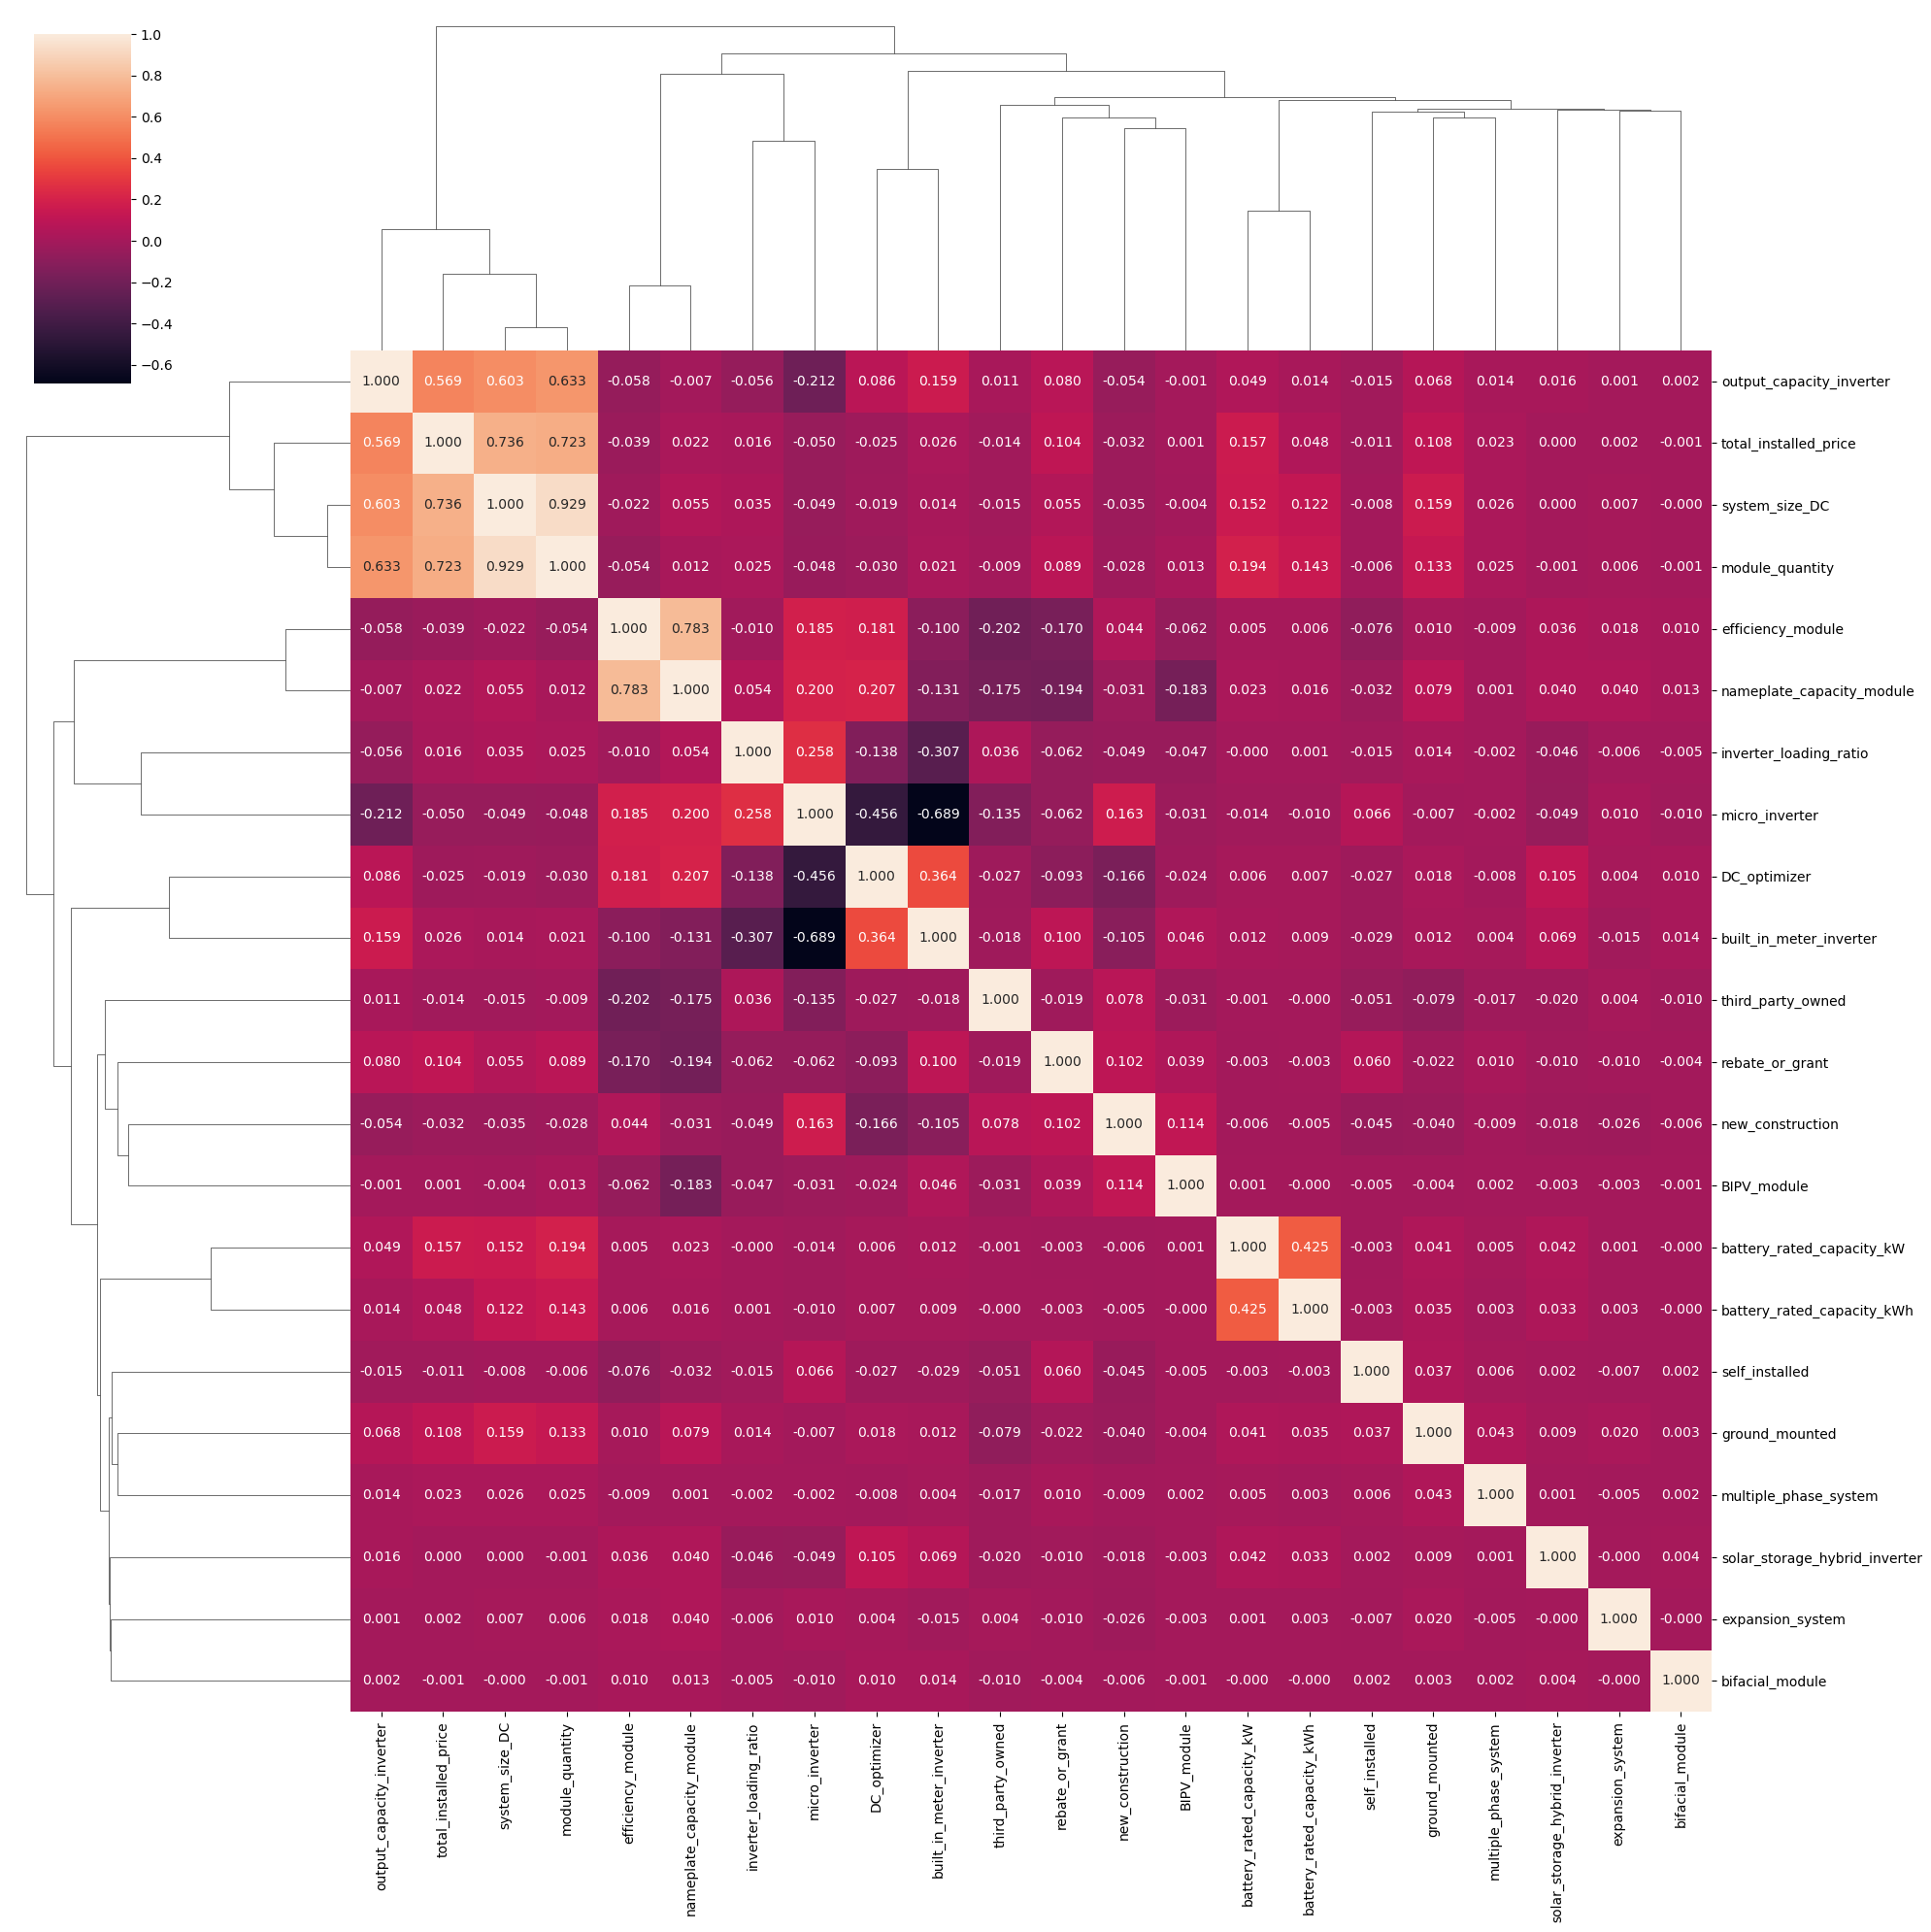

In [444]:
# Piirretään korrelaatiosta kuvaaja
import matplotlib.pyplot as plt
import seaborn as sns

esim109 = df_clean.corrwith(df_clean["total_installed_price"])

esim109

esim110 = df_clean.corr()
#plt.figure(figsize=(1000,1000))
sns.clustermap(esim110,annot=True,fmt=".3f", figsize=(20, 20))
plt.show()